In [1]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,0.0,0.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-05-19 00:00:00-04:00', '2023-05-22 00:00:00-04:00',
               '2023-05-23 00:00:00-04:00', '2023-05-24 00:00:00-04:00',
               '2023-05-25 00:00:00-04:00', '2023-05-26 00:00:00-04:00',
               '2023-05-30 00:00:00-04:00', '2023-05-31 00:00:00-04:00',
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23970, freq=None)

<Axes: xlabel='Date'>

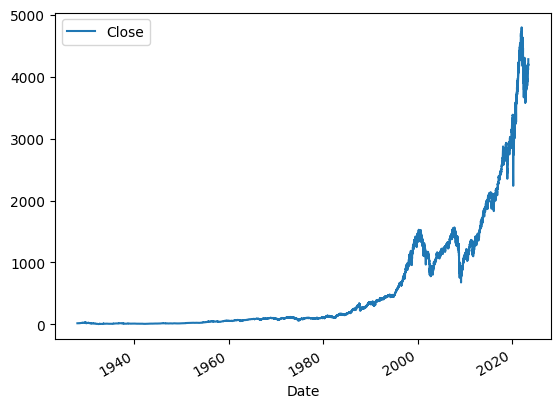

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500['Dividends']
del sp500['Stock Splits']

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1


In [11]:
sp500 = sp500.loc["1988-06-29":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1988-06-29 00:00:00-04:00,272.320007,273.010010,269.489990,270.980011,159590000,273.500000,1
1988-06-30 00:00:00-04:00,271.000000,273.510010,270.970001,273.500000,227410000,271.779999,0
1988-07-01 00:00:00-04:00,273.500000,273.799988,270.779999,271.779999,238330000,275.809998,1
1988-07-05 00:00:00-04:00,271.779999,275.809998,270.510010,275.809998,171790000,272.019989,0
1988-07-06 00:00:00-04:00,275.799988,276.359985,269.920013,272.019989,189630000,271.779999,0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1


In [13]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [15]:
precision_score(test["Target"], preds)

0.5172413793103449

<Axes: xlabel='Date'>

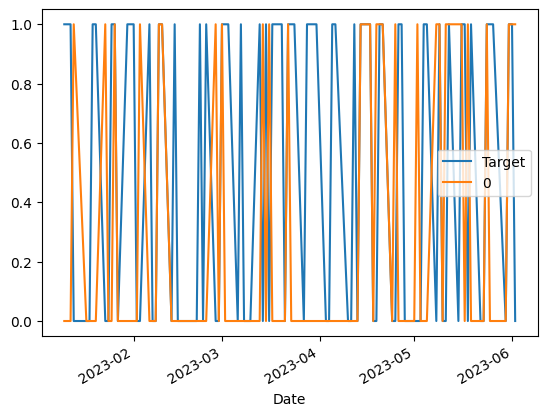

In [16]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(sp500, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    3992
1    2309
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5257687310524036

In [22]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [23]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1988-06-29 00:00:00-04:00,272.320007,273.010010,269.489990,270.980011,159590000,273.500000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-06-30 00:00:00-04:00,271.000000,273.510010,270.970001,273.500000,227410000,271.779999,0,1.004628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-07-01 00:00:00-04:00,273.500000,273.799988,270.779999,271.779999,238330000,275.809998,1,0.996846,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-07-05 00:00:00-04:00,271.779999,275.809998,270.510010,275.809998,171790000,272.019989,0,1.007360,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-07-06 00:00:00-04:00,275.799988,276.359985,269.920013,272.019989,189630000,271.779999,0,0.993082,1.0,0.997075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1,1.006482,2.0,1.010431,3.0,1.032086,32.0,1.059234,114.0,1.118712,533.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0,1.000008,2.0,1.009822,3.0,1.031429,32.0,1.059173,115.0,1.118338,533.0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1,0.996936,1.0,1.002006,3.0,1.024578,31.0,1.052619,115.0,1.111124,533.0


In [24]:
sp500 = sp500.dropna()

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1992-06-12 00:00:00-04:00,409.079987,411.859985,409.079987,409.760010,181860000,410.290009,1,1.000867,2.0,0.999668,2.0,0.997836,31.0,1.030937,119.0,1.195176,532.0
1992-06-15 00:00:00-04:00,409.760010,411.679993,408.130005,410.290009,164080000,408.320007,0,1.000646,2.0,1.002463,3.0,0.999107,31.0,1.031905,120.0,1.196245,532.0
1992-06-16 00:00:00-04:00,410.290009,411.399994,408.320007,408.320007,194400000,402.260010,0,0.997593,1.0,0.998499,3.0,0.994430,30.0,1.026610,119.0,1.190027,532.0
1992-06-17 00:00:00-04:00,408.329987,408.329987,401.980011,402.260010,227760000,400.959991,0,0.992524,0.0,0.986086,3.0,0.979976,30.0,1.011125,118.0,1.171934,531.0
1992-06-18 00:00:00-04:00,402.260010,402.679993,400.510010,400.959991,225600000,403.670013,1,0.998381,0.0,0.986813,2.0,0.977123,30.0,1.007553,118.0,1.167708,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00-04:00,4155.709961,4165.740234,4129.729980,4151.279785,4147760000,4205.450195,1,1.004360,1.0,0.998062,2.0,1.019727,32.0,1.045639,114.0,1.104693,533.0
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1,1.006482,2.0,1.010431,3.0,1.032086,32.0,1.059234,114.0,1.118712,533.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0,1.000008,2.0,1.009822,3.0,1.031429,32.0,1.059173,115.0,1.118338,533.0


In [26]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predictions = backtest(sp500, model, new_predictors)

In [35]:
predictions["Predictions"].value_counts()

Predictions
0.0    4535
1.0     765
Name: count, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5633986928104575